In [2]:
idx = 0

In [2]:
from voc2012 import VOC2012
import albumentations as A
import matplotlib.pyplot as plt

height, width = 512, 512

albumentation = A.Compose([
    A.Resize(height, width, always_apply=True),
    A.HorizontalFlip(p=0.3),
    A.CenterCrop(height=height, width=width, p=0.1),
    A.Blur(blur_limit=15, p=0.1),
])

voc2012_rendering = lambda name, image, mask: (image, mask[0]) if mask.ndim == 3 else (image, mask)

train_dataset = VOC2012(
    albumentation=albumentation, transformer=None,
    special_rendering=voc2012_rendering,
    train=True
)


def voc2012_decode(mask):
    cmap = train_dataset.decode_segmap(np.asarray(mask, dtype=np.uint8))
    cmap = np.uint8(cmap * 255)
    return cmap

decode = voc2012_decode

plt.imshow(np.hstack((image, mask)).astype(np.uint8))

plt.imshow((y_cmp * 255).astype(np.uint8))
plt.show()

In [27]:
from PIL import Image
import numpy as np

image = Image.open("/mnt/d/Datasets/VOCdevkit/VOC2012/SegmentationClass/pre_encoded/2007_000033.png")
nparr = np.array(image)

print(nparr.max(), nparr.min())

1 0


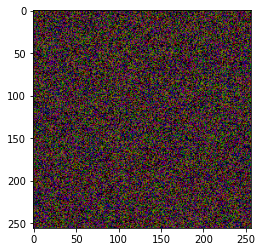

In [38]:
import torch
import voc2012
import matplotlib.pyplot as plt
from IPython.display import Image
import numpy as np
import cv2
voc_path = "/mnt/d/Datasets/VOCdevkit/VOC2012"
benchmark = "/mnt/d/Datasets/VOCdevkit/benchmark_RELEASE"

pascal_loader = voc2012.pascalVOCLoader(voc_path, benchmark)

classes = 5
y_pred = torch.randn(1, classes, 256, 256)
prob_mask = y_pred.sigmoid()
pred_mask = (prob_mask > 0.5).float()
pred_value = pred_mask.data.max(dim=1)[1]

y = torch.randint(0, classes+1, size=(256, 256))

y_cmp = pascal_loader.decode_segmap(np.asarray(y, dtype=np.uint8))
plt.imshow((y_cmp * 255).astype(np.uint8))
plt.show()

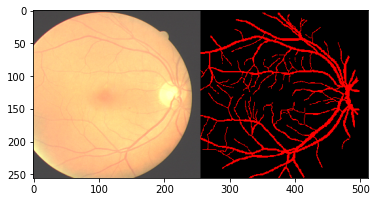

In [257]:
import albumentations as A
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms

import general_dataset

height, width = 256, 256
albumentation = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.OneOf([
        A.RandomGamma(p=0.3, gamma_limit=(80, 150)),
        A.CLAHE(p=0.3),#, clip_limit=(10, 50), tile_grid_size=(5, 5)),
        A.RandomBrightnessContrast(p=0.3, brightness_limit=(0.2, 0.3), contrast_limit=(0.1, 0.4), always_apply=False),
    ]),
    A.ElasticTransform(p=0.3, alpha=1, sigma=23, alpha_affine=40),
    A.ShiftScaleRotate(shift_limit=(-0.1, 0.1), rotate_limit=0, scale_limit=(-0.2, 0.2), p=0.5),
    A.Resize(height, width, always_apply=True),
])
#transform = transforms.Compose([transforms.ToTensor()])

data_path = "/home/akiyo/datasets/Retinal_Image_Database/DRIVE/training/images"
label_path = "/home/akiyo/datasets/Retinal_Image_Database/DRIVE/training/1st_manual"

train_dataset = general_dataset.GeneralDataset(
    image_dir=data_path, masks_dir=label_path, 
    image_extension="_training.tif", mask_extension="_manual1.gif", 
    albumentation=albumentation,# transformer=transform,
    special_rendering=general_dataset.GeneralDataset.special_rendering
)

i = np.random.randint(0, len(train_dataset))
image, mask = train_dataset[i]
mask = general_dataset.GeneralDataset.decode(mask)
plt.imshow(np.hstack((image, mask)).astype(np.uint8))
plt.show()